'''
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Can you predict if the customer is going to honor the reservation or cancel it ?
'''

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#24788f', '#1d7874', 'f4c095'])  # Replace with your desired colors

In [107]:
data = pd.read_csv('Hotel_Reservations.csv')

In [108]:
total_values = 36275

In [109]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [111]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


C:\Users\Namdev\AppData\Local\Temp\ipykernel_21780\1568100068.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,ax=ax)


<Axes: >

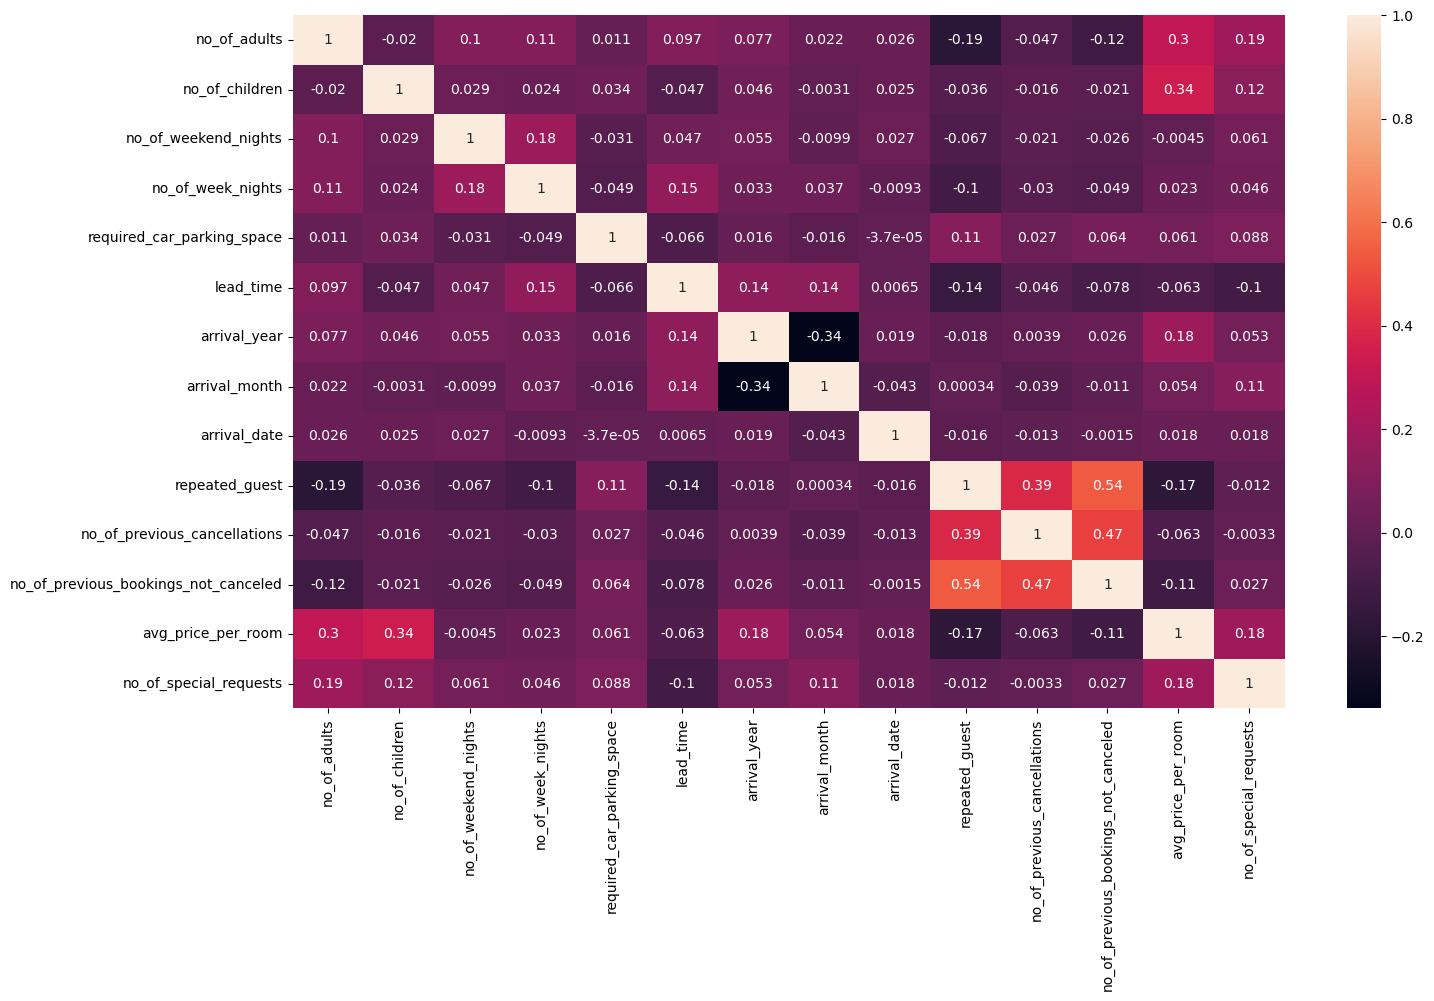

In [112]:
fig,ax = plt.subplots(1,1,figsize=(16,9))
sns.heatmap(data.corr(),annot=True,ax=ax)

## EDA

In [113]:
data1 = data[data['booking_status'] == 'Canceled']

<Axes: xlabel='no_of_adults'>

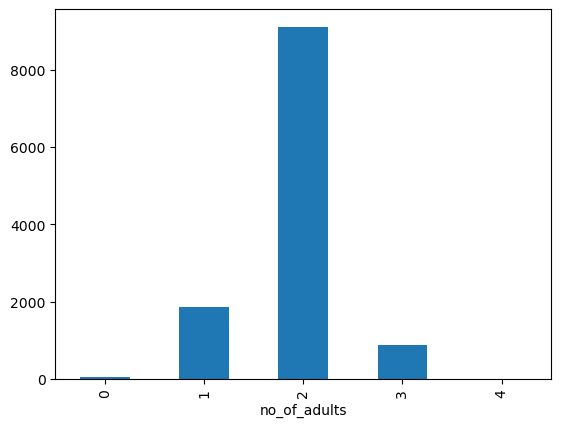

In [114]:
data1.groupby('no_of_adults').Booking_ID.nunique().plot(kind='bar')

<Axes: xlabel='no_of_children'>

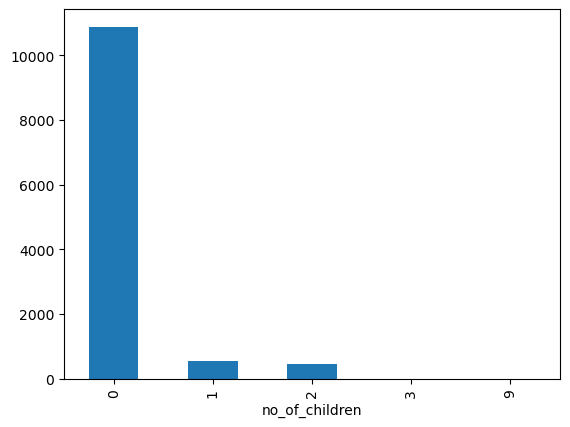

In [115]:
data1.groupby('no_of_children').Booking_ID.nunique().plot(kind='bar')

<Axes: ylabel='Booking_ID'>

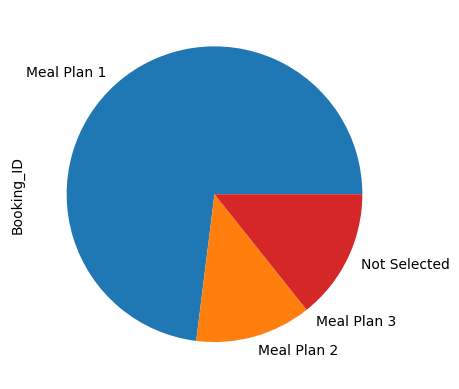

In [138]:
data1.groupby('type_of_meal_plan').Booking_ID.nunique().plot(kind='pie')

<Axes: ylabel='Frequency'>

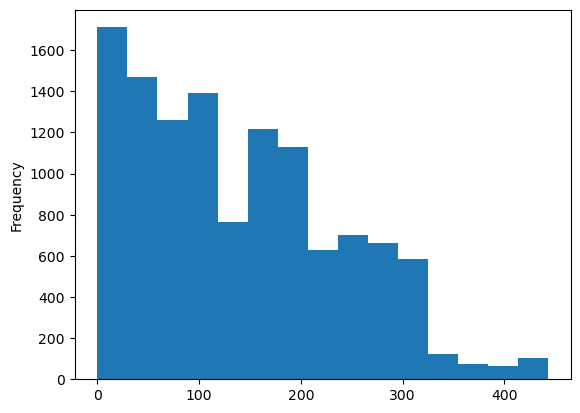

In [117]:
data1['lead_time'].plot(kind='hist',bins=15)

<Axes: xlabel='arrival_month'>

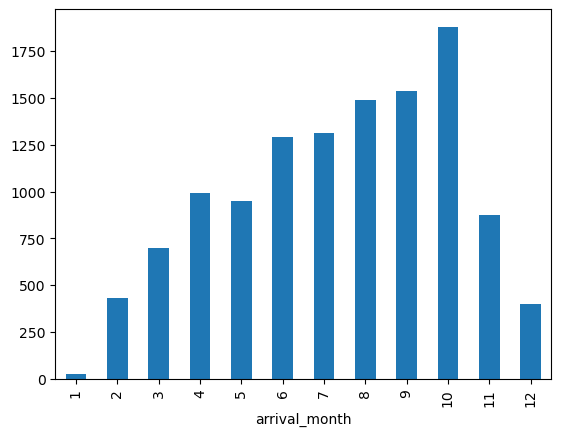

In [118]:
# Most of the cancellations are in the month of October
data1.groupby('arrival_month').Booking_ID.nunique().plot(kind='bar')

<Axes: ylabel='Booking_ID'>

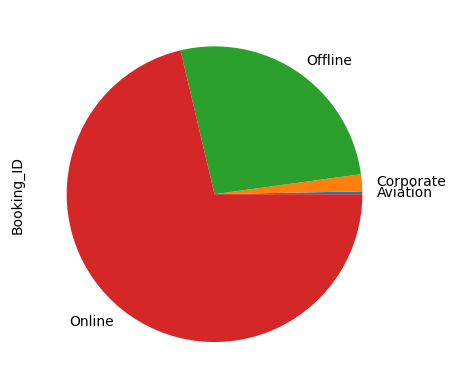

In [137]:
# Most of the cancellations are online based
data1.groupby('market_segment_type').Booking_ID.nunique().plot(kind='pie')

<Axes: xlabel='no_of_weekend_nights'>

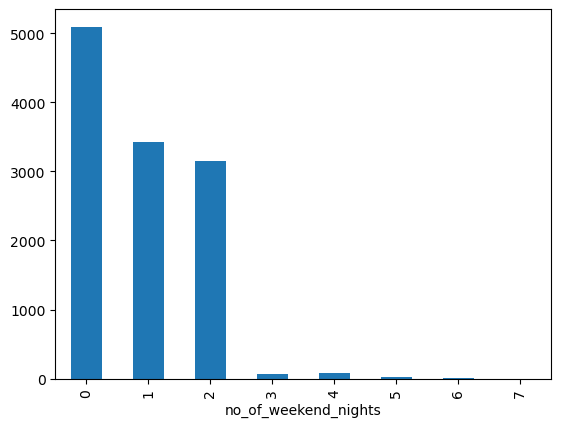

In [120]:
data1.groupby('no_of_weekend_nights').Booking_ID.nunique().plot(kind='bar')

<Axes: xlabel='no_of_week_nights'>

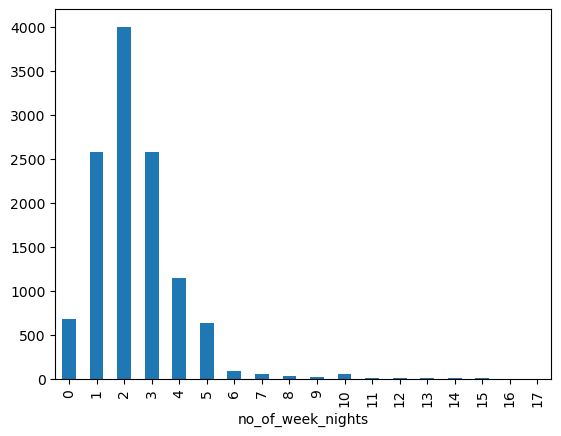

In [121]:
# People tends to cancel the booking when they have booked for 0-3 week nights
data1.groupby('no_of_week_nights').Booking_ID.nunique().plot(kind='bar')

<Axes: ylabel='Booking_ID'>

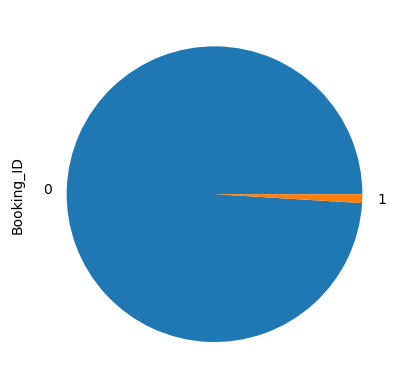

In [135]:
# Those who want car parking space are very less to cancel the reservations
data1.groupby('required_car_parking_space').Booking_ID.nunique().plot(kind='pie')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

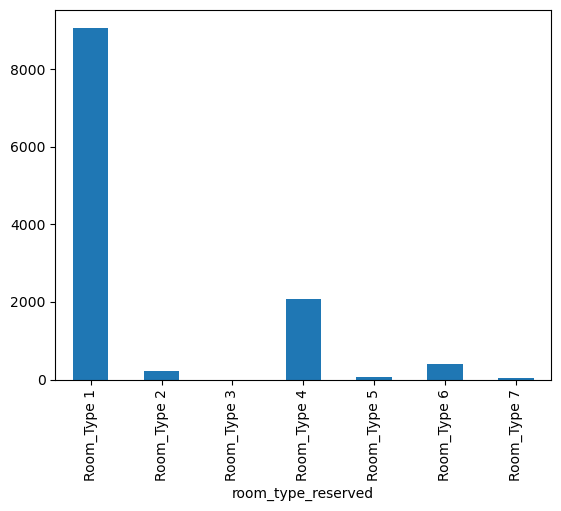

In [142]:
# Cancellations is prominant when the customer chooses for Room Type 1
data1.groupby('room_type_reserved').Booking_ID.nunique().plot(kind='bar')
plt.plot

<Axes: xlabel='repeated_guest'>

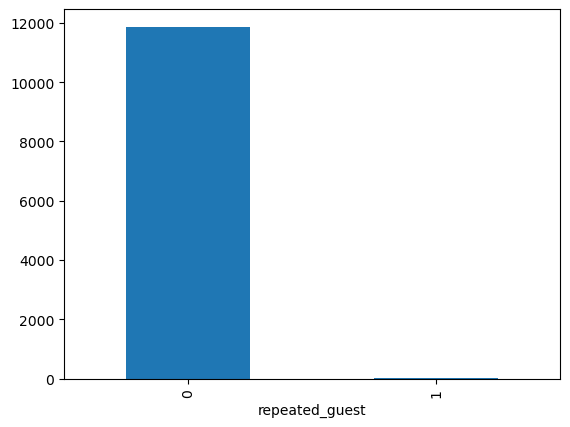

In [124]:
# Repeated Guest does not tend to cancel the bookings
data1.groupby('repeated_guest').Booking_ID.nunique().plot(kind='bar')

<Axes: xlabel='no_of_previous_cancellations'>

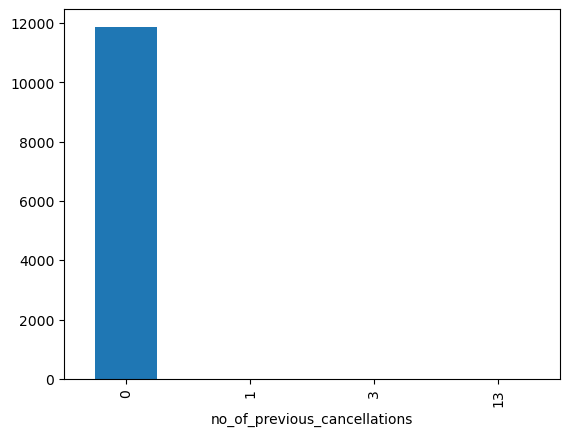

In [125]:
# Only customers who have not booked before have cancelled the bookings. This means that Customers thought of the package as value for money after checking out other options
data1.groupby('no_of_previous_cancellations').Booking_ID.nunique().plot(kind='bar')

<Axes: ylabel='Frequency'>

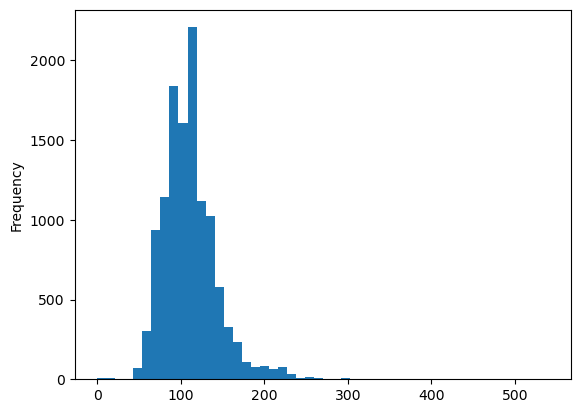

In [145]:
data1['avg_price_per_room'].plot(kind='hist',bins=50)

<Axes: xlabel='no_of_special_requests'>

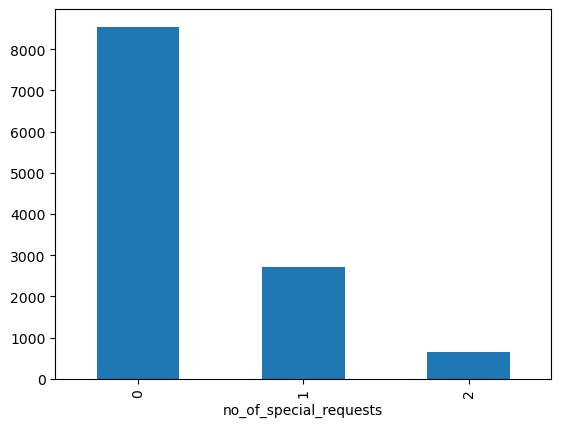

In [127]:
# Out of all cancellations, guests those who make more special requests, most of them do not cancel the booking
data1.groupby('no_of_special_requests').Booking_ID.nunique().plot(kind='bar')

## Advanced EDA

<Axes: xlabel='no_of_children,arrival_month'>

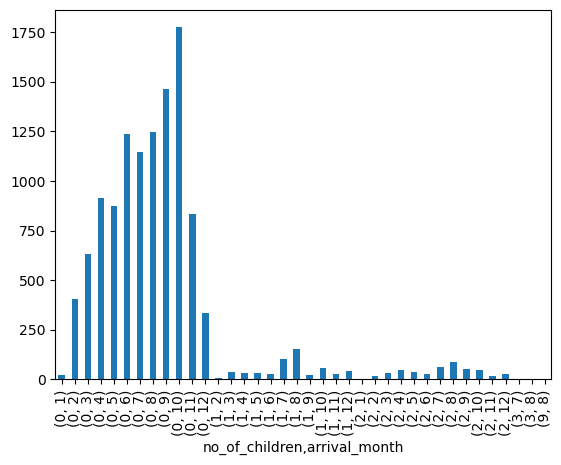

In [131]:
data1.groupby(['no_of_children','arrival_month']).Booking_ID.nunique().plot(kind='bar')

In [128]:
data_child_month = pd.DataFrame(data1.groupby(['no_of_children','arrival_month']).Booking_ID.nunique()).reset_index()

<Axes: >

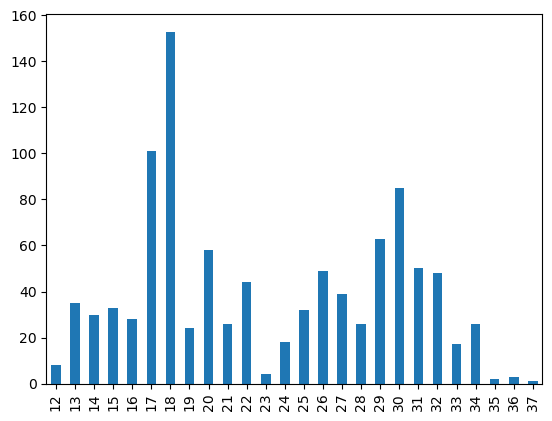

In [129]:
data_child_month[data_child_month['no_of_children']!=0]['Booking_ID'].plot(kind='bar')

<Axes: xlabel='repeated_guest,room_type_reserved'>

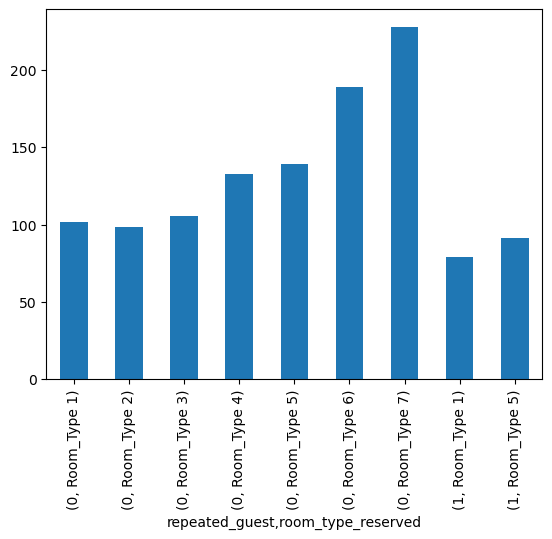

In [130]:
data1.groupby(['repeated_guest','room_type_reserved']).avg_price_per_room.mean().plot(kind='bar')

In [154]:
data[data['repeated_guest']==0].groupby('booking_status').avg_price_per_room.mean()

booking_status
Canceled        110.631083
Not_Canceled    101.278340
Name: avg_price_per_room, dtype: float64

## Observations

- No. of Adults
    - Most cancellations are when no. of adults are 2
- No. of Children
    - People with no children are most of the guests from cancellations
- Meal Plan Type
    - Out of all cancellations, most of the people cancelled who had Meal Plan 1
- Lead Time
    - most of the cancellations are done when the lead time is less and the cancellation frequency decreases as the lead time increases
- Arrival Month
    - Booking Cancellation increases as the year progresses, upto Oct and then drops significantly for the last two months
- Market Segment Type
    - Most of the cancellations are when the Market Segment Type is Online
- No. of Weekend Nights
    - Those who stay for less days on the weekends tends to cancel the bookings
- No. of Week Nights
    - Guests who live for less than 4 days, cancel bookings the most
- Required Parking Space
    - Most people who does not require car parking space, cancel the bookings
- Room Type Reserved
    - Most of the cancellations, are from the Room Type 1 which is almost 75%
- Repeated Guest
    - From the cancellations, almost all of the them are from the guests those who are visting the hotel for the first time
- No. of Previous Cancellations
    - From the cancellations, most of them have cancelled the bookings for the first time, indicating that they mostly are happy with the services
- Avg Price Per Room
    - People canceled for bookings for avg. price of almost 100
- No. of special requests
    - Out of all cancellations, guests with 0 special requests cancelled the most

### Combining Features

- No. of Children + Arrival Month
    - Most of the bookings will be canceled due to delays or changes in plan for guests who have children considering their academics if bookings are in Academic Year
    - Most of the cancellations are in July, August indicating that cancellations are due to academics of the children
- Repeated + Guest
    - Gives an idea of whether the prices are high. Here the avg. price is 110.6 for canceled status and 101.2 for not canceled status